<a href="https://colab.research.google.com/github/Mghane/My-Py-Docs/blob/master/Pro_1_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project 1: Predict MNIST dataset
#### November 2020
#### Mehdi Ghane

In [232]:
import tensorflow as tf
print(tf.__version__)
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn-whitegrid')

2.3.0


In [39]:
# call dataset
mnist = tf.keras.datasets.mnist

In [43]:
# load data into appropriate variables
(X_train, y_train) , (X_test, y_test) = mnist.load_data()

In [49]:
# normalizing the data between 0 and 1
X_train = X_train / X_train.max()
X_test = X_test / X_test.max()

In [50]:
X_train.shape, X_test.shape

((60000, 28, 28), (10000, 28, 28))

In [51]:
y_train.shape, y_test.shape

((60000,), (10000,))

In [122]:
# to reset the dense layer numbers if there are any already
from keras import backend as K
K.clear_session()

In [123]:
# set the model
model = tf.keras.models.Sequential([ 
        tf.keras.layers.Flatten(input_shape= (28,28)),
        tf.keras.layers.Dense(128, activation="relu"),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')        
        ])

In [124]:
# model compile
model.compile(optimizer='adam', 
              loss = 'sparse_categorical_crossentropy',
              metrics = 'accuracy')

In [125]:
# model tunning
epochs = 15
history = model.fit( X_train, y_train, validation_data=(X_test, y_test), epochs=epochs)

Epoch 1/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2957 - accuracy: 0.9144 - val_loss: 0.1448 - val_accuracy: 0.9569
Epoch 2/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1413 - accuracy: 0.9578 - val_loss: 0.0972 - val_accuracy: 0.9702
Epoch 3/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1063 - accuracy: 0.9683 - val_loss: 0.0880 - val_accuracy: 0.9737
Epoch 4/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0885 - accuracy: 0.9724 - val_loss: 0.0763 - val_accuracy: 0.9754
Epoch 5/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0750 - accuracy: 0.9763 - val_loss: 0.0730 - val_accuracy: 0.9782
Epoch 6/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0654 - accuracy: 0.9794 - val_loss: 0.0722 - val_accuracy: 0.9786
Epoch 7/15
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0589 - accuracy: 0.9808 - val_loss: 0.0731 - val_accuracy:

In [126]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.0778 - accuracy: 0.9806


[0.07782331109046936, 0.9805999994277954]

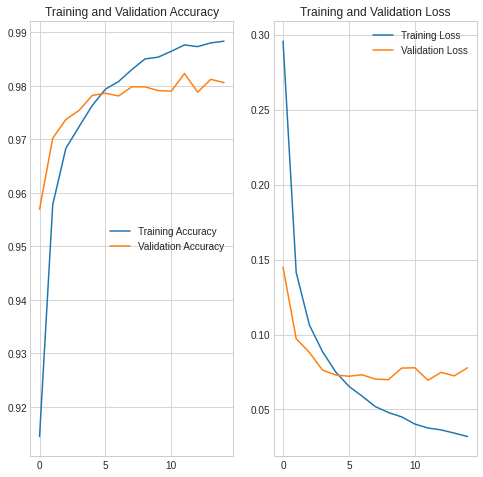

In [233]:
# plot the accuracy and loss for history data
training_accuracy = history.history['accuracy']
validation_accuracy = history.history['val_accuracy']

training_loss = history.history['loss']
validation_loss = history.history['val_loss']

epochs_range=range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, training_accuracy, label='Training Accuracy')
plt.plot(epochs_range, validation_accuracy, label='Validation Accuracy')

plt.legend(loc='center right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, training_loss, label='Training Loss')
plt.plot(epochs_range, validation_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [199]:
# prediction
pred = model.predict(X_test)

In [210]:
# find the index of maximum probability for figures in test and prediction
pred_values = [i.index(max(i)) for i in pred.tolist()]
test_values = y_test.tolist()

In [215]:
# index number of similars and differents

similars_index = [i for i, ele in enumerate(zip(test_values, pred_values)) if ele[0] == ele[1]]
different_index = [i for i, ele in enumerate(zip(test_values, pred_values)) if ele[0] != ele[1]]

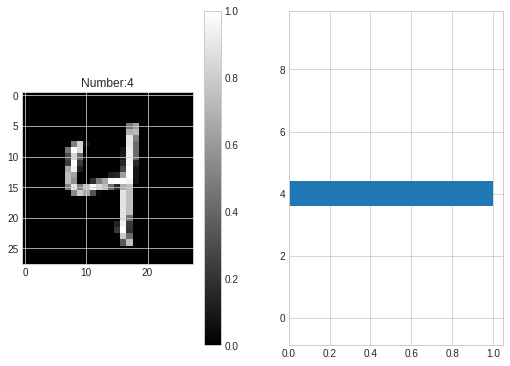

In [234]:
# look at a random similar
i = np.random.choice(similars_index)
predict = model.predict(X_test)[i]

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(X_test[i], cmap='gray')
plt.title('Number:{}'.format(y_test[i]))
plt.colorbar()
ax2 = fig.add_subplot(1,2,2)
ax2.barh(y=np.arange(0,10).tolist(),width= predict.tolist()) 
fig.tight_layout(pad=4.0)
plt.show()

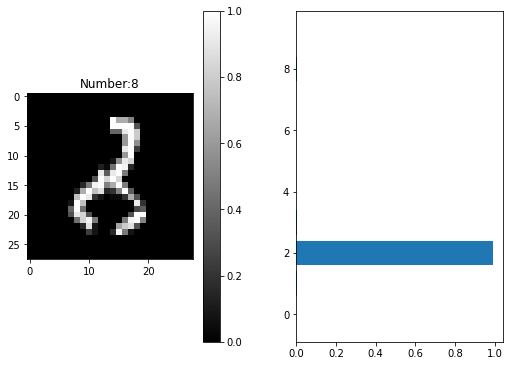

In [219]:
# look at a random differents
i = np.random.choice(different_index)
predict = model.predict(X_test)[i]

fig = plt.figure(figsize=(8,6))
ax1 = fig.add_subplot(1,2,1)
plt.imshow(X_test[i], cmap='gray')
plt.title('Number:{}'.format(y_test[i]))
plt.colorbar()
ax2 = fig.add_subplot(1,2,2)
ax2.barh(y=np.arange(0,10).tolist(),width= predict.tolist()) 
fig.tight_layout(pad=4.0)
plt.show()

Confusion matrix, without normalization
[[ 968    0    1    1    1    1    2    2    2    2]
 [   0 1120    3    2    0    1    4    1    4    0]
 [   3    0 1016    4    0    0    1    2    5    1]
 [   0    0    3  996    0    6    0    3    2    0]
 [   1    0    3    0  943    0    5    5    2   23]
 [   3    0    0    8    1  873    2    0    4    1]
 [   2    2    0    1    3    2  948    0    0    0]
 [   1    7    9    2    0    0    0 1003    1    5]
 [   1    0    2    3    4    3    2    2  956    1]
 [   1    3    0    6    4    5    0    3    4  983]]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:37: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


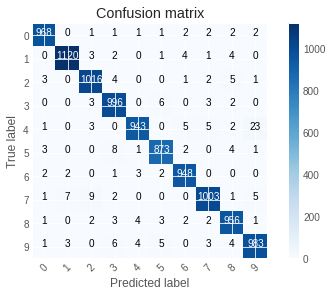

In [240]:
# Plot confusion matrix
plt.style.use('ggplot')
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  ax = plt.axes()
  ax.set(xlabel='Predicted label', ylabel='True label')
  plt.show()


p_test = model.predict(X_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

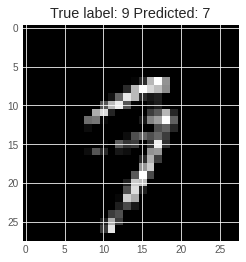

In [242]:
# Another way to Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(X_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], p_test[i]));

### End of Document

